In [ ]:
# Naive Bayes: Spam Detection

In [ ]:
# Source : https://media.githubusercontent.com/media/musthave-ML10

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://media.githubusercontent.com/media/musthave-ML10/data_source/main/spam.csv')
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df['target'].unique()
# The target variable has two distinct values: ham (non-spam) and spam.

array(['ham', 'spam'], dtype=object)

In [ ]:
# In natural language processing, words are the basic unit of data, so special symbols like commas and periods are considered noise and need to be removed.

In [4]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
sample_string = df['text'].loc[0]
sample_string

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
for i in sample_string:
    if i not in string.punctuation:
        print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
 
c
r
a
z
y
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t


In [8]:
new_string = []
for i in sample_string:
    if i not in string.punctuation:
        new_string.append(i)
new_string = ''.join(new_string)
new_string

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [ ]:
# I worked on creating a function that can be applied to the entire dataset.

In [9]:
def remove(x):
    new_string = []
    for i in x:
        if i not in string.punctuation:
            new_string.append(i)
    new_string = ''.join(new_string)
    return new_string

In [10]:
remove(sample_string)

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [11]:
data = pd.Series([[1,2],[3,4,5]])
def check_len(x):
    return len(x)
data.apply(check_len)

,0
0,2
1,3


In [12]:
df.text = df.text.apply(remove)

In [13]:
df.text

,text
0,Go until jurong point crazy Available only in ...
1,Ok lar Joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor U c already then say
4,Nah I dont think he goes to usf he lives aroun...
...,...
5569,This is the 2nd time we have tried 2 contact u...
5570,Will ü b going to esplanade fr home
5571,Pity was in mood for that Soany other suggest...
5572,The guy did some bitching but I acted like id ...


In [ ]:
# After preprocessing special characters, I removed stopwords. Stopwords are words that do not contribute much to natural language analysis. For this, each string stored in the pandas Series was converted into a list of words.
# Then, each word was checked: if it was not a stopword, it was stored in lowercase. Finally, the words were joined back into a string, and this process was repeated for all rows.

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [16]:
sample_string2 = 'This is not - SPAM'

In [17]:
sample_string2.split('-')

['This is not ', ' SPAM']

In [18]:
sample_string = df['text'].loc[0]
sample_string.split()

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [19]:
def stop(x):
    new_string = []
    for i in x.split():
        if i.lower() not in stopwords.words('english'):
            new_string.append(i.lower())
    new_string = ' '.join(new_string)
    return new_string

df['text'] = df['text'].apply(stop)
df['text']

,text
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
2,free entry 2 wkly comp win fa cup final tkts 2...
3,u dun say early hor u c already say
4,nah dont think goes usf lives around though
...,...
5569,2nd time tried 2 contact u u £750 pound prize ...
5570,ü b going esplanade fr home
5571,pity mood soany suggestions
5572,guy bitching acted like id interested buying s...


In [21]:
df['target'] = df['target'].map({'spam':1, 'ham':0})
df['target']

,target
0,0
1,0
2,1
3,0
4,0
...,...
5569,1
5570,0
5571,0
5572,0


In [22]:
x = df['text']
y = df['target']

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(x)
cv.vocabulary_

{'go': 3791,
 'jurong': 4687,
 'point': 6433,
 'crazy': 2497,
 'available': 1414,
 'bugis': 1881,
 'great': 3888,
 'world': 9184,
 'la': 4847,
 'buffet': 1879,
 'cine': 2214,
 'got': 3848,
 'amore': 1181,
 'wat': 8947,
 'ok': 5995,
 'lar': 4886,
 'joking': 4655,
 'wif': 9079,
 'oni': 6027,
 'free': 3577,
 'entry': 3160,
 'wkly': 9136,
 'comp': 2330,
 'win': 9093,
 'fa': 3296,
 'cup': 2553,
 'final': 3421,
 'tkts': 8380,
 '21st': 454,
 'may': 5335,
 '2005': 441,
 'text': 8217,
 '87121': 875,
 'receive': 6833,
 'questionstd': 6724,
 'txt': 8592,
 'ratetcs': 6776,
 'apply': 1267,
 '08452810075over18s': 71,
 'dun': 3011,
 'say': 7192,
 'early': 3031,
 'hor': 4222,
 'already': 1154,
 'nah': 5682,
 'dont': 2918,
 'think': 8291,
 'goes': 3805,
 'usf': 8741,
 'lives': 5050,
 'around': 1318,
 'though': 8310,
 'freemsg': 3585,
 'hey': 4118,
 'darling': 2617,
 'weeks': 9002,
 'word': 9170,
 'back': 1464,
 'id': 4343,
 'like': 5000,
 'fun': 3652,
 'still': 7860,
 'tb': 8147,
 'xxx': 9309,
 'std': 

In [24]:
x = cv.transform(x)
print(x)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 47493 stored elements and shape (5574, 9437)>
  Coords	Values
  (0, 1181)	1
  (0, 1414)	1
  (0, 1879)	1
  (0, 1881)	1
  (0, 2214)	1
  (0, 2497)	1
  (0, 3791)	1
  (0, 3848)	1
  (0, 3888)	1
  (0, 4687)	1
  (0, 4847)	1
  (0, 6433)	1
  (0, 8947)	1
  (0, 9184)	1
  (1, 4655)	1
  (1, 4886)	1
  (1, 5995)	1
  (1, 6027)	1
  (1, 9079)	1
  (2, 71)	1
  (2, 441)	1
  (2, 454)	1
  (2, 875)	1
  (2, 1267)	1
  (2, 2330)	1
  :	:
  (5570, 3188)	1
  (5570, 3564)	1
  (5570, 3810)	1
  (5570, 4188)	1
  (5571, 5566)	1
  (5571, 6359)	1
  (5571, 7611)	1
  (5571, 7986)	1
  (5572, 999)	1
  (5572, 1665)	1
  (5572, 1916)	1
  (5572, 3103)	1
  (5572, 3577)	1
  (5572, 3701)	1
  (5572, 3950)	1
  (5572, 4343)	1
  (5572, 4480)	1
  (5572, 5000)	1
  (5572, 5777)	1
  (5572, 7636)	1
  (5572, 8731)	1
  (5572, 8997)	1
  (5573, 5688)	1
  (5573, 7052)	1
  (5573, 8538)	1


In [25]:
from sklearn.model_selection import train_test_split
xtr,xt,ytr,yt = train_test_split(x,y, test_size = 0.2, random_state = 100)

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(xtr,ytr)
pred = nb.predict(xt)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(yt, pred)

0.9856502242152466

In [27]:
print(confusion_matrix(yt, pred))

[[965  12]
 [  4 134]]


<Axes: >

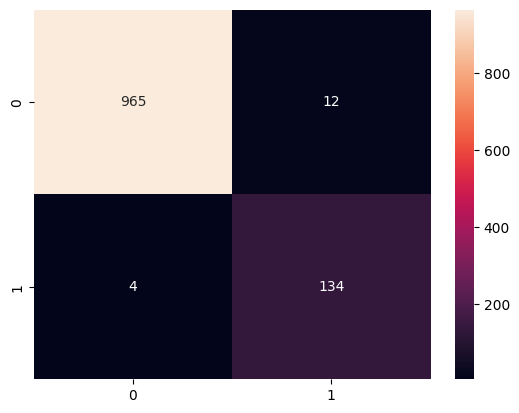

In [28]:
sns.heatmap(confusion_matrix(yt,pred), annot = True, fmt = '.0f')